### **We are creating an NBA analytics app that helps people extrapolate cool insights. How do we do this?**
###### let's think ##

We will need a way to:
1. Intake stats from sources (Web, CSV, SQL, etc.)
2. Relational db of players with stats
3. Analyze via functions

Keeping simplicity in mind, the easiest functionality we can code is accessing a single player's stats (we'll use points) for the current 2022 NBA Season.

CSV's would be an easy choice, but it will be outdated as the season progresses. 
We could manually code a web-scraper, but this would require a long time investment and time is valuable.
API commands to pull from a source are a good compromise.

For now, let's deal with CSV's.

In [ ]:
import pandas as pd # Module Importing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/Users/kareemtaha/Downloads/2022-2023 NBA Player Stats - Regular.csv', sep=";", index_col=0, encoding = 'latin') # the csv uses colons (;) instead of commas (,) to separate values
#df = df.drop(columns="Rk") # drop unnecessary Rk column. Useful if we used player names as our index, but that complicates functions later, so we just leave RK.
df

Great! We have our players this season, their teams, and their stats. Let's return one player.

In [ ]:
df.query('Player=="Marcus Smart"') # via query
df[df['Player'] == 'Marcus Smart'] # via series (same code)

In [ ]:
All_Stats = df.columns.values.tolist()
Qual_Stats = ["Pos", "Tm"]
Quant_Stats = ["Age", "G", "GS", "MP", "PTS", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P","2PA","2P%","eFG%","FT","FTA","FT%","ORB","DRB","TRB","AST","STL","BLK","TOV","PF"]

In [ ]:
def parse_player_df(d, players, stats = Quant_Stats): # USE CASE: MULTI-PLAYER SEASON AVERAGES
    if stats != None: #User specifies certain stats (non-default)
        stats = stats.copy()
        try: assert "Player" in stats #Makes sure that when we shrink the df to those stats, we don't accidentally remove the Player Name col (needed for compares)
        except AssertionError: stats.append("Player") 
        d = d[stats]
    return d[d['Player'].isin(players)]

pd.concat([parse_player_df(df, ["Damian Lillard", "Stephen Curry", "Kevin Durant"], All_Stats), 
            parse_player_df(df, ["LeBron James"], All_Stats), 
            parse_player_df(df, ["Josh Hart", "Nassir Little"], All_Stats)])

We can now compare two players current league stats. Neat.

Next, let's see some visuals since I am tired of seeing words and text.

In [ ]:
def Visualize_Stats(d, players, stats = Quant_Stats, seasons = ["2022"], to_list = False, stacked_bar = False):
    try: assert len(stats) > 0# Stats Setup - Ensure we don't accidentally remove the Player Name col (needed for compares) {
    except AssertionError: stats = ["PTS"] # .. 
    stats = stats.copy()
    
    d = d[["Player"] + stats]                  # .. - shrink to stats (retain player to search their stats later)                          # ..
    d = parse_player_df(d, players, stats = stats)

    num_players = len(players)
    multiple_players = num_players > 1                 # .. } Stats Setup
    num_seasons = len(seasons)
    multiple_seasons = num_seasons > 1
    # Matplotlib Graph Subplot Setup
    if multiple_seasons:                                                                                           # MULTIPLE SEASONS
        if stacked_bar: fig, ax = plt.subplots(num_seasons, figsize=(15,3.5 * num_seasons))                       # STACKED GRAPH: one graph per season
        else: fig, ax = plt.subplots(num_players * num_seasons, figsize=(15,3.5 * num_seasons * num_players))     # NON-STACKED GRAPH: one per player per season
    elif multiple_players and not stacked_bar:                                                                     # ONE SEASON
        fig, ax = plt.subplots(num_players, figsize=(15,3.5 * num_players))                                       # MULTIPLE PLAYER, NONSTACKED GRAPH: one per player 
    else: plt.figure(figsize=(15,3.5 * num_players))                                                              # MULTIUPLE PLAYER, STACKED GRAPH: one graph

    season_stats = []
    for s in range(num_seasons):
        season = seasons[s]
        return_stats = []
        for i in range(num_players):
            name = players[i]
            player_df = d[d['Player'] == name]   
            player_stats = []  

            for stat in stats:
                value = player_df[stat].iat[0]
                if "%" in stat: value *= 100
                if type(value) != str: value = round(value,2);player_stats.append(value)

            if multiple_seasons:
                if stacked_bar:
                    ax[s].set_title(f"{players} {season} stat comparison:")
                    b = ax[s].bar(x = stats, height = player_stats)
                    ax[s].bar_label(b, player_stats) # Add player stats to the bars
                else:
                    subp_index = i + s * num_seasons
                    ax[subp_index].set_title(f"{name}'s {season} stats:")
                    b = ax[subp_index].bar(x = stats, height = player_stats)
                    ax[subp_index].bar_label(b, player_stats) # Add player stats to the bars
            elif stacked_bar:                                             # Stacked graph: Overlay player stats (bar)
                plt.title(f"{players} {season} stat comparison:")
                b = plt.bar(x = stats, height = player_stats)
                plt.bar_label(b, player_stats) # Add player stats to the bars
            elif multiple_players:                                      # Non-stacked graph: Check how many players                                             # 2+ players : Use 2+ graphs
                ax[i].set_title(f"{name}'s {season} stats:")
                b = ax[i].bar(x=stats, height=player_stats)
                ax[i].bar_label(b, player_stats)      
            else:                                           # 1 player : Use one graph
                plt.title(f"{name}'s {season} stats:")
                b = plt.bar(x = stats, height = player_stats) 
                plt.bar_label(b, player_stats)                      #if !to_list: (complete this if block if you want to_list to not also graph stats
                                                                            #ax[i].legend()
            
            return_stats.append([name] + player_stats) # Add player stats to all stats to return
        season_stats.append([season] + return_stats)
    #plt.legend(players)
    if to_list: return season_stats

#Visualize_Stats(df, players = ["Damian Lillard"])
#Visualize_Stats(df, players = ["Damian Lillard"], to_list=True)
Visualize_Stats(df, players = ["Damian Lillard", "Josh Hart"], seasons = ["2022", "2021"], stats=Quant_Stats, stacked_bar=True)
#f = Visualize_Stats(df, players = ["Damian Lillard", "Stephen Curry"], to_list=True)
#f[1]


We can now visualize a player's stats and compare them to someone else's.
## What do we do now?

###### Great question

First let's create a function that let's us live compare players: 

In [ ]:
def Live_Compare(d, stacked_bar = False):
    selected = []
    players = d['Player'].values
    player = input("Which player's stats would you like to see? (' ' to terminate)")

    while player in players:
        selected.append(player)
        player = input("Which player's stats would you like to see? (' ' to terminate)")
    
    if len(selected) > 0: Visualize_Stats(d, selected, stacked_bar = stacked_bar)
    else: print("No players given!")

#Compare_Players(df)
Live_Compare(df, True)




Not bad, but now we need to work with more insightful data than season averages if we want to do advanced computations. Let's get game-by-game info's for players (We'll use LeBron's stats from (https://www.basketball-reference.com/players/j/jamesle01/gamelog/2023)).

In [ ]:
lebron_2023_html = pd.read_html("https://www.basketball-reference.com/players/j/jamesle01/gamelog/2023#pgl_basic", match="Regular Season")[0].copy() # returns html tables list
lebron_2023_html

lebron_2023 = lebron_2023_html.copy() # re-copy from the html table to not accidentally overwrite data
lebron_2023.rename(columns = {'Unnamed: 5':'Away', 'Unnamed: 7': 'Result'}, inplace = True) # Rename columns properly
lebron_2023.set_index('Rk', inplace = True) # Set the Rk number (team game) as the index
lebron_2023['Away'].mask(lebron_2023['Away'] == '@', True, inplace=True) ; lebron_2023['Away'] = lebron_2023['Away'].fillna(False) # replace values in away column with bool
lebron_2023 = lebron_2023.dropna(subset=['G']) # drop unplayed games
lebron_2023 = lebron_2023[lebron_2023['G'] != 'G']
lebron_2023

And the same for career stats. We need to get the years that LeBron has played, so we know which years to look up his per-game stats. We will extend this to every player.

In [ ]:
def get_player_career_stats(player_tag): return pd.read_html(f"https://www.basketball-reference.com/players/{player_tag[0]}/{player_tag}.html#per_game")[0].copy()

lebron_tag = "jamesle01"
lebron_career_stats = get_player_career_stats(lebron_tag)
lebron_career_stats

In [ ]:
lebron_career = lebron_career_stats.copy()                                             # Get the per-game stats for the player's career
lebron_career.dropna(subset=['Age'], inplace=True)                                    # drop unplayed seasons (bloater rows)
lebron_seasons = lebron_career['Season'].apply(lambda x: int(x[0:2] + x[5:7])).values # get the seasons he played
lebron_seasons

Given an HTML link, we've learned how to parse the table, clean up the data into a readable format, and locate useful information to finding even further information. Given a player's NBA URL-specific tag, we can find their seasons and corresponding stats for that respective season, then clean that data in a DataFrame format.

In [ ]:
def get_player_seasons_list(player_tag):
    df = pd.read_html(f'https://www.basketball-reference.com/players/{player_tag[0]}/{player_tag}.html#per_game')[0].copy()
    df.dropna(subset=['Age'], inplace=True) # drop unplayed seasons, which is just bloater rows
    return df['Season'].apply(lambda x: int(x[0:2] + x[5:7])).values # get the seasons he played

def get_player_gamelogs(player_tag, season):
    return pd.read_html(f"https://www.basketball-reference.com/players/{player_tag[0]}/{player_tag}/gamelog/{season}#pgl_basic", match="Regular Season")[0].copy() # returns html tables list

lebron_seasons_list = get_player_seasons_list(lebron_tag)
lebron_season4 = get_player_gamelogs(lebron_tag, lebron_seasons_list[3])
lebron_season4

def clean_gamelogs(d, season_stats = False):
    d = d.copy() # Copy the original df to avoid errors
    d.dropna(subset=['Age'], inplace=True)
    d = d[d['Age'] != 'Age'] # = d[d["Rk"] != "Rk"] # Remove extra rows (there are rows that repeat the original column headers, but do not contain values (because the table is 80+ rows))
    if not season_stats: 
        d.rename(columns = {'Rk':'Game', 'G':'Played','Unnamed: 5':'Away', 'Unnamed: 7': 'Result'}, inplace = True) # rename column headers
        d.set_index('Game', inplace = True) # Set the game # as the index
        d['Away'].mask(d['Away'] == '@', True, inplace=True);d['Away'] = d['Away'].fillna(False) # replace values in away column with bool
        d.dropna(subset=['Played'], inplace=True) # drop unplayed games
    return d

clean_gamelogs(lebron_season4)

We can now get a player's career stats AND season stats given the proper html links. But how do we get those links? My approach is to use HTML parsing to take them from each Team's pages.

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import re
import time
def pull_player_tags(roster_htmls):

    player_tags = {}
    pattern = '/[a-zA-Z]*/[a-zA-Z]/([a-zA-Z\d]*)'

    for roster in roster_htmls:
        html_page = urllib.request.urlopen(roster)
        soup = BeautifulSoup(html_page, "html.parser")

        for table in soup.findAll('table', attrs={'id': 'per_game'}):
            for tbody in table.findAll('tbody'):
                for tr in tbody.findAll('tr'):
                    for td in tr.findAll('td', attrs={'data-stat': ['player']}):
                        for a in td.findAll('a'):
                            player = a.text
                            link = a['href']
                            link = re.findall(pattern, link)[0]
                    player_tags[player] = link
    return player_tags

POR_link = "https://www.basketball-reference.com/teams/POR/2023.html#roster"
ATL_link = "https://www.basketball-reference.com/teams/ATL/2023.html#all_roster"
POR_ATL_roster = pull_player_tags([POR_link, ATL_link])
POR_ATL_roster

In [ ]:
def pull_league_tags(return_html = True):

    league_rosters = {}
    pattern = '/[a-zA-Z]*/([a-zA-Z]*)/'

    html_page = urllib.request.urlopen('https://www.basketball-reference.com/leagues/NBA_2023_standings.html')
    soup = BeautifulSoup(html_page, "html.parser")

    for table in soup.findAll('table', attrs={'id': ['confs_standings_E', 'confs_standings_W']}):
        for tbody in table.findAll('tbody'):
            for tr in tbody.findAll('tr'):
                for th in tr.findAll('th', attrs={'data-stat': ['team_name']}):
                    for a in th.findAll('a'):
                        team = a.text
                        team_link = a['href']
                        team_link = re.findall(pattern, team_link)[0]
                        if return_html: team_link = f'https://www.basketball-reference.com/teams/{team_link}/2023.html#roster'
                league_rosters[team] = team_link
    return league_rosters

Rosters = pull_league_tags()

temp = {}
for team, link in Rosters.items(): temp = temp | pull_player_tags([link]) ; time.sleep(0.25)
league_tags = temp.copy()

In [ ]:
def get_player_tags(players): return [league_tags.get(key) for key in players]
get_player_tags(['Damian Lillard','Josh Hart','Aaron Gordon'])

Everything is starting to come full circle, but we need to easily access roster pages for different teams if we want to pull their pages.

In [ ]:
def produce_player_gamelogs(players, seasons):
    player_dfs = []
    multiple = len(players) > 1
    for player in players:
        player_tag = get_player_tags([player])[0]
        for season in seasons:
            season_games = get_player_gamelogs(player_tag, season)
            clean_df = clean_gamelogs(season_games)
            clean_df['Season'] = season
            if multiple: clean_df['Player'] = player
            player_dfs.append(clean_df)
    return pd.concat(player_dfs)
produce_player_gamelogs(['Damian Lillard', 'LeBron James'], ['2021'])

In [ ]:
def produce_player_career_stats(players):
    player_dfs = []
    multiple = len(players) > 1
    for player in players:
        player_tag = get_player_tags([player])[0]
        career_stats = get_player_career_stats(player_tag)
        clean_df = clean_gamelogs(career_stats, True)
        if multiple: clean_df['Player'] = player
        player_dfs.append(clean_df)
    return pd.concat(player_dfs)
produce_player_career_stats(['Damian Lillard', 'LeBron James'])

In [ ]:
def Super_Simulate(league_tags):
    NBA_players = league_tags.keys()

    selected_players = []
    player = input("TYPE DESIRED PLAYERS (' ' for STAT SELECTION)")

    while player in NBA_players:
        selected_players.append(player)
        player = input("TYPE DESIRED PLAYERS (' ' for STAT SELECTION)")
    
    selected_stats = []
    stat = input("TYPE DESIRED STATS (' ' for SEASON SELECTION)")
    while stat != ' ':
        selected_stats.append(stat)
        stat = input("TYPE DESIRED STATS (' ' for SEASON SELECTION)")

    selected_seasons = []
    season = input("TYPE DESIRED SEASON (' ' for VISUALIZATION)")
    while season != ' ':
        selected_seasons.append(season)
        season = input("TYPE DESIRED SEASON (' ' for VISUALIZATION)")

    if len(selected_players) < 1: print("No players given!")
    if len(selected_stats) < 1: print("No stats given!")
    if len(selected_seasons) < 1: print("No seasons given!")

    cs = produce_player_career_stats(selected_players)
    reduced = cs[cs['Season'].apply(lambda x: x[0:4]).isin(selected_seasons)]
    Visualize_Stats(d = reduced, players = selected_players, stats = selected_stats, seasons = selected_seasons, to_list = False, stacked_bar = False)
    #print(reduced)

#Compare_Players(df)
Super_Simulate(league_tags)

Now that we have a live comparison function, I am going to:
- abstract out the methods (methods.py) and tests (tests.py) from this notebook so that it can be used as an efficient, readable standalone program.
- I've decided to include implimentation for I/O (IO.py) (so that certain files musn't be repeatedly pulled from BBREF) 
- and an Object-Oriented (OO.py) setup to make file and data interaction simpler(WIP).

##### 12/20 Update: I have continued background development (not in this .ipynb).  
**While I can choose to maintain my code in this Jupyter notebook, it is difficult to maintain extensive functionality in a single notebook.** \
**(i.e. instead of using this notebook as the base of my code development, I will write code in other modules and import them here when I want to do stuff).**

* Functions.py - all of the program's user functions used for data analysis, cleaning, etc.
* Objects.py - Implimentation for 'League', 'Team', and 'Player' Objects, which can store data
* main.py - main environment where user can write/execute desired code
* tests.py - Testing module using unittest framework
* IO
    * File_IO.py - Save/read data via files, such as league/team/player objects and/or url dictionaries
    * HTML_IO.py - Read data via HTML, such as league/team/player objects and/or url dictionaries

* Data
    * franchise_dict.txt - Dictionary file with team names and corresponding urls
    * players_dict.txt - Dictionary file with player names and corresponding url tags (used in urls)
    * League.db - Database file that holds League/Team/Player objects


In [1]:
from Functions import *
from Objects import *
from IO.File_IO import *
NBA = League("NBA")
NBA.set_teams()
FileIO_Save_Object("NBA", NBA)
NBA.get_teams(["Portland Trail Blazers", "Phoenix Suns"])

{'Portland Trail Blazers': <Objects.Team at 0x21a3adbf710>,
 'Phoenix Suns': <Objects.Team at 0x21a3adbf610>}

The above cell tests the ability to create league objects, set up teams in that object via functions, get teams, and save that object to a file.

In [3]:
NBA2 = FileIO_Load_Object("NBA")
NBA2.set_league_players()
NBA2.get_teams(["Portland Trail Blazers", "Phoenix Suns"])["Phoenix Suns"].print_players()


Milwaukee Bucks's players have been created!
Cleveland Cavaliers's players have been created!
Brooklyn Nets's players have been created!
Philadelphia 76ers's players have been created!
New York Knicks's players have been created!
Miami Heat's players have been created!
Indiana Pacers's players have been created!
Atlanta Hawks's players have been created!
Toronto Raptors's players have been created!
Chicago Bulls's players have been created!
Washington Wizards's players have been created!
Orlando Magic's players have been created!
Detroit Pistons's players have been created!
Charlotte Hornets's players have been created!
Memphis Grizzlies's players have been created!
New Orleans Pelicans's players have been created!
Denver Nuggets's players have been created!
Phoenix Suns's players have been created!
Sacramento Kings's players have been created!
Portland Trail Blazers's players have been created!
Utah Jazz's players have been created!
Los Angeles Clippers's players have been created!
Da

While this cell tests the ability to load objects from files and use their corresponding methods.

In [2]:
NBA.set_players()
NBA.set_stats(seasons=True, career=True)
FileIO_Save_Object("NBA", NBA)

Setting Milwaukee Bucks's player seasons!
Setting Milwaukee Bucks's player career stats!
Setting Cleveland Cavaliers's player seasons!
Setting Cleveland Cavaliers's player career stats!
Setting Brooklyn Nets's player seasons!
Setting Brooklyn Nets's player career stats!
Setting Philadelphia 76ers's player seasons!
Setting Philadelphia 76ers's player career stats!
Setting New York Knicks's player seasons!
Setting New York Knicks's player career stats!
Setting Miami Heat's player seasons!
Setting Miami Heat's player career stats!
Setting Indiana Pacers's player seasons!
Setting Indiana Pacers's player career stats!
Setting Atlanta Hawks's player seasons!
Setting Atlanta Hawks's player career stats!
Setting Toronto Raptors's player seasons!
Setting Toronto Raptors's player career stats!
Setting Chicago Bulls's player seasons!
Setting Chicago Bulls's player career stats!
Setting Washington Wizards's player seasons!
Setting Washington Wizards's player career stats!
Setting Orlando Magic's p

In [4]:

NBA3 = FileIO_Load_Object("NBA")
dame, steph = NBA3.get_players(players=["Damian Lillard", "Stephen Curry"])
print(dame, steph)

Damian Lillard Stephen Curry


Damian Lillard's seasons have been set!
Damian Lillard's stats have been set


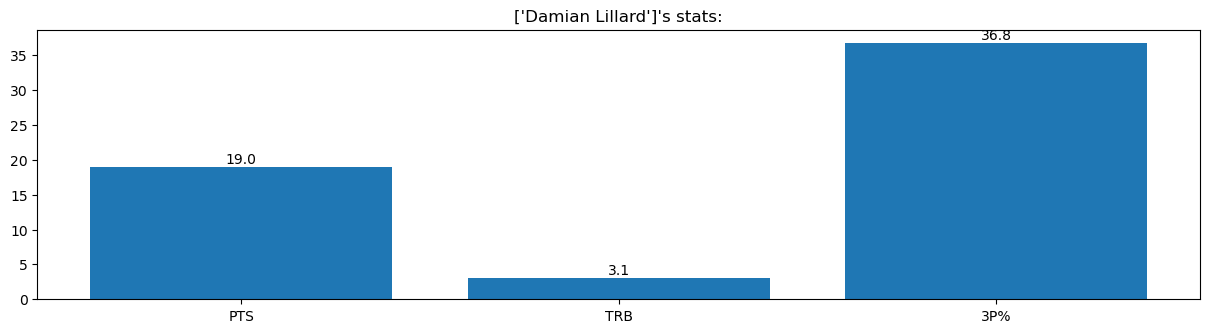

In [3]:
from Functions import *
from Objects import *
from IO.File_IO import *
from tkinter import *
from requests import *
dame = Player("Damian Lillard")
dame.set_stats()
dame.visualize(df_name="Averages", stats=["PTS", "TRB", "3P%"])

In [1]:
from Functions import *
from Objects import *
from IO.File_IO import *
NBA3 = League("NBA")
NBA3.set_teams()
NBA3.set_league_players()
NBA3.set_stats()
FileIO_Save_Object("NBA3", NBA3)

Boston Celtics's players have been created!
Brooklyn Nets's players have been created!
Milwaukee Bucks's players have been created!
Cleveland Cavaliers's players have been created!
Philadelphia 76ers's players have been created!
Indiana Pacers's players have been created!
Miami Heat's players have been created!
New York Knicks's players have been created!
Atlanta Hawks's players have been created!
Washington Wizards's players have been created!
Chicago Bulls's players have been created!
Toronto Raptors's players have been created!
Orlando Magic's players have been created!
Charlotte Hornets's players have been created!
Detroit Pistons's players have been created!
Denver Nuggets's players have been created!
Memphis Grizzlies's players have been created!
New Orleans Pelicans's players have been created!
Dallas Mavericks's players have been created!
Sacramento Kings's players have been created!
Los Angeles Clippers's players have been created!
Portland Trail Blazers's players have been cr

In [3]:
from Main import *
NBA = League("NBA")
NBA.set_teams()
PB = NBA.get_teams(["Portland Trail Blazers"])["Portland Trail Blazers"].set_stats()
FileIO_Save_Object("PB", PB)

Boston Celtics's players have been created!
Brooklyn Nets's players have been created!
Milwaukee Bucks's players have been created!
Cleveland Cavaliers's players have been created!
Philadelphia 76ers's players have been created!
Indiana Pacers's players have been created!
Miami Heat's players have been created!
New York Knicks's players have been created!
Atlanta Hawks's players have been created!
Washington Wizards's players have been created!
Chicago Bulls's players have been created!
Toronto Raptors's players have been created!
Orlando Magic's players have been created!
Charlotte Hornets's players have been created!
Detroit Pistons's players have been created!
Denver Nuggets's players have been created!
Memphis Grizzlies's players have been created!
New Orleans Pelicans's players have been created!
Dallas Mavericks's players have been created!
Sacramento Kings's players have been created!
Los Angeles Clippers's players have been created!
Portland Trail Blazers's players have been cr

AttributeError: 'dict' object has no attribute 'set_stats'